# Importing the necessary libraries

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from category_encoders import CountEncoder
import category_encoders
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# Reading the data

In [4]:
transaction_data = pd.read_csv('sample_transaction_data.csv')
transaction_data.dtypes

transaction_id         object
targets                 int64
transaction_date       object
account_open_date      object
transaction_amount    float64
                       ...   
col_111                  bool
col_112               float64
col_113               float64
col_114                 int64
col_115               float64
Length: 122, dtype: object

# EDA

In [311]:
transaction_data.head()

,transaction_id,targets,transaction_date,account_open_date,transaction_amount,beneficiary,col_0,col_1,col_2,col_3,...,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115
0,TRX00000000,1,2021-10-03,2021-06-28,52092.586207,Manny's Auto Parts,0.0,False,25.0,0,...,0,1,False,0,0,True,0.0,0.0,0,0.0
1,TRX00000001,0,2021-10-03,2021-05-16,50042.970326,Zach's Agriculture,0.0,False,25.0,0,...,0,1,False,0,0,False,NaN,0.0,0,0.0
2,TRX00000002,0,2021-10-03,2021-04-19,54255.114574,Fiona's Technical Services,0.0,False,25.0,0,...,0,1,False,0,0,False,NaN,0.0,0,NaN
3,TRX00000003,0,2021-10-03,2021-04-13,61722.527737,Omar's Exteriors,0.0,True,25.0,0,...,0,1,False,0,0,False,1.0,0.0,0,NaN
4,TRX00000004,0,2021-10-03,2021-03-15,54313.312765,Steve's Utilities,0.0,True,25.0,0,...,98,1,False,14,0,False,NaN,0.0,0,29.0


In [57]:
transaction_data.describe()

,targets,transaction_amount,col_0,col_3,col_4,col_8,col_9,col_10,col_13,col_14,...,col_104,col_105,col_106,col_107,col_109,col_110,col_112,col_113,col_114,col_115
count,15781.000000,1.578100e+04,12186.000000,15781.000000,15781.000000,15781.000000,10898.000000,15781.000000,15781.0,9740.000000,...,5485.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,2150.000000,10438.0,15781.000000,11437.000000
mean,0.047589,1.101420e+05,0.004185,0.266967,2.487358,0.669413,17.052028,334.344718,0.0,0.027002,...,0.015314,0.377733,9.180153,0.999937,9.205120,1.112287,0.006512,0.0,0.010392,7.206610
std,0.212901,3.396154e+05,0.064560,1.858497,47.191492,20.223097,180.610973,728.378619,0.0,0.162098,...,0.122812,4.114176,112.744071,0.007960,75.953666,5.382758,0.080450,0.0,0.833864,24.631301
min,0.000000,5.000317e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,5.213120e+04,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,5.812264e+04,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,8.108830e+04,0.000000,0.000000,0.000000,0.000000,7.000000,334.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000
max,1.000000,2.089189e+07,1.000000,117.000000,5054.000000,2441.000000,13567.000000,25927.000000,0.0,1.000000,...,1.000000,297.000000,9789.000000,1.000000,4924.000000,202.000000,1.000000,0.0,102.000000,973.000000


### Average transaction amount is 110142.0 which is way higher than the cost of reviewing the false positives. So, it is evident that the cost of false negative is much higher than cost of a false positive(200 Dollars to investigate). Recall is more important than precision for this analysis.

In [54]:
transaction_data['targets'].value_counts(normalize=True)*100

0    95.241113
1     4.758887
Name: targets, dtype: float64

<AxesSubplot:xlabel='targets', ylabel='count'>

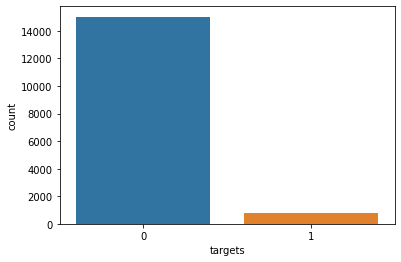

In [50]:
sns.countplot(x='targets',data=transaction_data)

### The above plot shows the count of fraud and non-fraud data. 
### The dataset is clearly imbalanced! To counter this, we may use sampling (oversampling/undersampling) or weigh the minority class higher while defining the loss function, use the right error metrics(precision, recall, f1 or AUC-ROC), stratify samples during train-test split, and carefully deal with outliers.

Text(0.5, 1.0, 'Count of fraudulent transactions over the time period of the data')

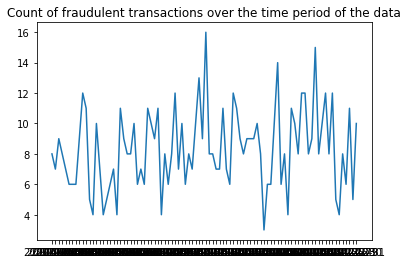

In [78]:
plt.plot(transaction_data.groupby(['transaction_date'])['targets'].sum())
plt.title('Count of fraudulent transactions over the time period of the data')

### Let's do the analysis by month, day, week-wise and look for patterns.Repeat the same for transaction amount.

In [80]:
transaction_data['transaction_date']=pd.to_datetime(transaction_data['transaction_date'],format="%Y-%m-%d")
transaction_data['transaction_date_day'] = transaction_data.apply(lambda x: x['transaction_date'].day_name(),axis=1)

In [83]:
fraudulent_transactions_each_day = dict(transaction_data.groupby(['transaction_date_day'])['targets'].sum())

In [85]:
ord_list = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
fraudulent_transactions_each_day = {key : fraudulent_transactions_each_day[key] for key in ord_list}

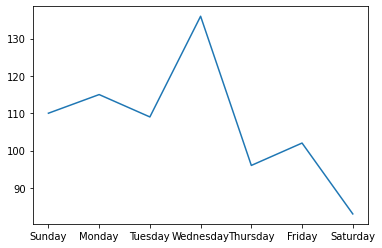

In [86]:
plt.plot(fraudulent_transactions_each_day.keys(), fraudulent_transactions_each_day.values())

### We see that Wednesday has the highest number of fraudulent transactions across all days of the week. The value may be significant to draw conclusions. So, let's look at the distribution of number of transactions across the days of the week.

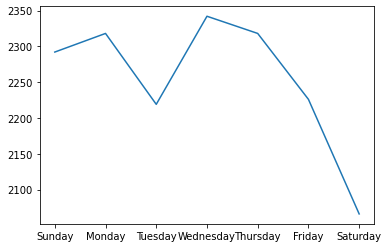

In [90]:
transactions_each_day = dict(transaction_data.groupby(['transaction_date_day'])['targets'].count())
transactions_each_day = {key : transactions_each_day[key] for key in ord_list}
plt.plot(transactions_each_day.keys(), transactions_each_day.values())

### We see that Wednesday also has the highest number of transactions which could be the reason why we have a high number of fraudulent cases. After checking this across months, I found that there were no singificant findings.

# Feature engineering

### Creating a new feature called number of days between account creation and this transaction

In [92]:
transaction_data['account_open_date']=pd.to_datetime(transaction_data['account_open_date'],format="%Y-%m-%d")
transaction_data['transaction_date']=pd.to_datetime(transaction_data['transaction_date'],format="%Y-%m-%d")

transaction_data['Days_bw_creation_and_transaction']=transaction_data['transaction_date']-transaction_data['account_open_date']

transaction_data['Days_bw_creation_and_transaction']=transaction_data['Days_bw_creation_and_transaction']/np.timedelta64(1, 'D')

transaction_data[transaction_data['Days_bw_creation_and_transaction']<0]#Checking for inconsistencies

,transaction_id,targets,transaction_date,account_open_date,transaction_amount,beneficiary,col_0,col_1,col_2,col_3,...,col_110,col_111,col_112,col_113,col_114,col_115,company,industry,transaction_date_day,Days_bw_creation_and_transaction


In [93]:
transaction_data.groupby('targets')['Days_bw_creation_and_transaction'].mean()

targets
0    178.728424
1     92.387483
Name: Days_bw_creation_and_transaction, dtype: float64

### We see that on average, the day count between creation and transaction for fraud is almost half that of regular cases. This could be a useful indicator if we knew the historical transactions of the user.

In [19]:
#Looking at the count of unique and null values for each column. This will be used to define the variables.
for i in transaction_data.columns:
    print(f'Column {i} of type {transaction_data[i].dtype} has {len(transaction_data[i].unique())} unique values and {transaction_data[i].isnull().sum()} null values')

Column transaction_id of type object has 15781 unique values and 0 null values
Column targets of type int64 has 2 unique values and 0 null values
Column transaction_date of type object has 90 unique values and 0 null values
Column account_open_date of type object has 311 unique values and 106 null values
Column transaction_amount of type float64 has 15781 unique values and 0 null values
Column beneficiary of type object has 1531 unique values and 0 null values
Column col_0 of type float64 has 3 unique values and 3595 null values
Column col_1 of type bool has 2 unique values and 0 null values
Column col_2 of type object has 66 unique values and 0 null values
Column col_3 of type int64 has 30 unique values and 0 null values
Column col_4 of type int64 has 144 unique values and 0 null values
Column col_5 of type bool has 2 unique values and 0 null values
Column col_6 of type bool has 2 unique values and 0 null values
Column col_7 of type object has 5 unique values and 0 null values
Column 

In [122]:
#Continuous numerical variables are the variables that can take a wide range of values. Here, I'm assuming that 
#the continuous variable will at least have more unique values than 10 percent of the length of the data.
numeric_columns = []
for i in transaction_data.select_dtypes(np.number).columns:
    if len(transaction_data[i].unique())>len(transaction_data)*0.10:
        numeric_columns.append(i)
numeric_columns

['transaction_amount', 'col_10', 'col_38', 'col_89', 'col_90']

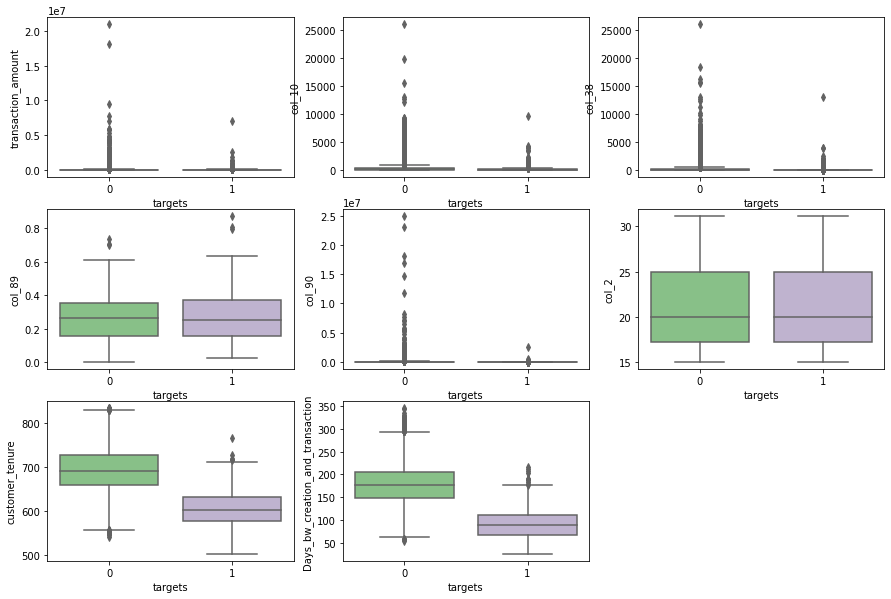

In [299]:
# box plot of numerical features vs Target
fig = plt.figure(figsize = (15,10))
for i in range(len(numeric_columns)):
    column = numeric_columns[i]
    sub= fig.add_subplot(3, 3, i + 1)
    sns.boxplot(x = 'targets', y = column, data = transaction_data, palette = "Accent")

In [22]:
transaction_data[numeric_columns]

,transaction_amount,col_10,col_38,col_89,col_90
0,52092.586207,11,0,0.538550,0.000000
1,50042.970326,23,0,0.381115,0.000000
2,54255.114574,58,0,NaN,0.000000
3,61722.527737,44,29,0.178724,225.800000
4,54313.312765,1608,3034,0.394032,28343.108225
...,...,...,...,...,...
15776,58000.013393,477,686,0.328141,21179.633803
15777,50356.467423,788,1059,0.168923,45954.358974
15778,51274.840357,108,30,0.253509,172617.923077
15779,51612.014451,167,88,0.479414,323.500000


In [123]:
#This column has a few '.'. We'll convert that to nan and impute it based on K-Nearest Neighbour
numeric_columns.append('col_2')

### Theoretically, 25 to 30% missing values are permissible, beyond which we might want to drop the variable from analysis. But, when dealing with real-world data, it is quite common to witness more than 50% missing entries. Let's take a look at the missing value distribution!

In [28]:
null_percent = dict((transaction_data.isnull().sum()*100)/len(transaction_data))
null_percent

{'transaction_id': 0.0,
 'targets': 0.0,
 'transaction_date': 0.0,
 'account_open_date': 0.6716938090108359,
 'transaction_amount': 0.0,
 'beneficiary': 0.0,
 'col_0': 22.78055889994297,
 'col_1': 0.0,
 'col_2': 0.0,
 'col_3': 0.0,
 'col_4': 0.0,
 'col_5': 0.0,
 'col_6': 0.0,
 'col_7': 0.0,
 'col_8': 0.0,
 'col_9': 30.942272352829352,
 'col_10': 0.0,
 'col_11': 0.0,
 'col_12': 0.0,
 'col_13': 0.0,
 'col_14': 38.28021037957037,
 'col_15': 0.0,
 'col_16': 0.0,
 'col_17': 71.4910335213231,
 'col_18': 0.0,
 'col_19': 0.0,
 'col_20': 18.224447119954377,
 'col_21': 0.0,
 'col_22': 32.11456815157468,
 'col_23': 33.033394588429125,
 'col_24': 0.0,
 'col_25': 0.0,
 'col_26': 0.0,
 'col_27': 0.0,
 'col_28': 0.0,
 'col_29': 0.0,
 'col_30': 0.0,
 'col_31': 0.0,
 'col_32': 0.0,
 'col_33': 0.0,
 'col_34': 0.0,
 'col_35': 0.0,
 'col_36': 0.0,
 'col_37': 0.0,
 'col_38': 0.0,
 'col_39': 77.47924719599519,
 'col_40': 0.0,
 'col_41': 0.0,
 'col_42': 0.0,
 'col_43': 0.0,
 'col_44': 24.83366073125911,
 'co

In [40]:
list(filter(lambda x: x > 0, list(null_percent.values())))

[0.6716938090108359,
 22.78055889994297,
 30.942272352829352,
 38.28021037957037,
 71.4910335213231,
 18.224447119954377,
 32.11456815157468,
 33.033394588429125,
 77.47924719599519,
 24.83366073125911,
 73.8039414485774,
 89.24022558773208,
 2.5410303529560863,
 47.842342056903874,
 22.15955896331031,
 28.781446042709586,
 78.6768899309296,
 27.444395158735187,
 11.158988657246056,
 28.344211393447818,
 55.516126988150305,
 65.24301375071288,
 86.37602179836512,
 33.857170014574486,
 27.526772701349724]

### We see that there are quite a few null percent that are greater 50 percent null values. Since, we don't have much information about the features being used. Let's set a threshold of 65 percent as the permissible amount of missing values. This is quite high! but, we can impute and later drop them if they don't add any value.

In [41]:
del_cols = ((transaction_data.isnull().sum()*100)/len(transaction_data)>65)
del_cols = del_cols[del_cols==True].index.tolist()
del_cols

['col_17', 'col_39', 'col_50', 'col_62', 'col_80', 'col_104', 'col_112']

### Now, there a few columns which have the same value for all the data points. These columns are not of any value. So, appending them to the list which will later be used to drop the unnecessary columns.

In [43]:
del_cols = del_cols + transaction_data.nunique()[transaction_data.nunique() < 2].index.tolist()
del_cols

['col_17',
 'col_39',
 'col_50',
 'col_62',
 'col_80',
 'col_104',
 'col_112',
 'col_13',
 'col_21',
 'col_23',
 'col_25',
 'col_26',
 'col_27',
 'col_43',
 'col_45',
 'col_81',
 'col_87',
 'col_92',
 'col_94',
 'col_101',
 'col_103',
 'col_113',
 'col_13',
 'col_21',
 'col_23',
 'col_25',
 'col_26',
 'col_27',
 'col_43',
 'col_45',
 'col_81',
 'col_87',
 'col_92',
 'col_94',
 'col_101',
 'col_103',
 'col_113']

In [44]:
len(transaction_data['transaction_id'].unique())

15781

In [45]:
len(transaction_data['beneficiary'].unique())

1531

In [55]:
transaction_data['beneficiary'].unique()

array(["Manny's Auto Parts", "Zach's Agriculture",
       "Fiona's Technical Services", ..., "Jack's Leasing",
       "Zach's Insurance", "Christ's Retail"], dtype=object)

### The above feature beneficiary can be split into two valuable columns: Company and Industry

In [64]:
transaction_data['company'],transaction_data['industry'] = zip(*transaction_data.apply(lambda x: x['beneficiary'].split("'s"),
                                                                                       axis=1))

In [73]:
company_grouped = transaction_data.groupby(['company'])['targets'].mean()
company_grouped.sort_values(ascending=False)

company
Nora        0.083636
Webber      0.082474
Uma         0.082192
Isabelle    0.072519
Quincy      0.071698
Wayne       0.069841
Zach        0.068441
Elena       0.067227
Griffin     0.063158
Hunter      0.061818
Fiona       0.059801
Victoria    0.059347
Terry       0.059055
Elvin       0.058182
Xavier      0.058020
Oliver      0.055944
Xena        0.055921
Rachel      0.055749
Manny       0.055738
Cecilia     0.054237
Christ      0.053872
Quinn       0.053571
Aurora      0.050420
Jones       0.048276
Kate        0.047619
Hans        0.046358
Omar        0.045161
Kathy       0.044379
Ben         0.043189
George      0.042705
David       0.042484
Theresa     0.042254
Sara        0.041935
Yolanda     0.041791
Louis       0.040404
Zoe         0.040000
Pedro       0.039344
Yadiel      0.039088
Romeo       0.038835
Frank       0.038217
Jack        0.035599
Ulrike      0.035294
Victor      0.034884
Drew        0.034247
Ivan        0.031250
Patricia    0.029940
Nick        0.027778
Steve

In [76]:
industry_grouped = transaction_data.groupby(['industry'])['targets'].mean()
industry_grouped.sort_values(ascending=False)

industry
 Retail                   0.594059
 Health Care              0.578431
 Entertainment            0.564815
 Pharma                   0.557895
 Biology                  0.551724
 Construction             0.540541
 Theater                  0.512000
 Mechanical               0.507692
 Auto Parts               0.495495
 Leasing                  0.469027
 Real Estate              0.408000
 Insurance                0.322835
 Public Administration    0.007947
 Tutoring                 0.007500
 Sports Facility          0.007435
 Moving Company           0.006649
 Hunting                  0.006468
 Accounting               0.006329
  Manufacturing           0.005270
 Consulting               0.005222
 Exteriors                0.005102
 Forestry                 0.003717
 Technical Services       0.003628
 Wholesale                0.003614
 Fishing                  0.003538
 Food Processing          0.003534
 Mining                   0.001263
 Utilities                0.001233
 Agricultur

### This could be a useful column. We see that on an average, Retail, Health care, Entertainment have the highest fraud contribution. whereas gardening, agriculture and utilites have the least.

### We may also consider customer tenure as another feature (Number of days between current date and account opening date). But, given the dataset is old, it is unlikely to add value. 

In [117]:
transaction_data['customer_tenure'] = (pd.Timestamp.now(tz=None) - pd.to_datetime(transaction_data['account_open_date'],
                                                                                  format="%Y-%m-%d")).dt.days

In [99]:
#Converting '.' to NaN for imputing with KNN
transaction_data.loc[transaction_data['col_2']=='.','col_2']=np.nan

transaction_data['col_2'] = transaction_data['col_2'].astype(float)

In [118]:
#Dropping the date,id columns and appending the derived features to the numeric columns
transaction_data.drop(columns=del_cols+['transaction_id','account_open_date','transaction_date','beneficiary'],inplace=True)
numeric_columns.extend(['customer_tenure','Days_bw_creation_and_transaction'])

### Let's check the other numbered columns which are not continuous in nature.

In [131]:
#All these columns look like they are ordinal in nature. So, let's use them as categorical
for i in transaction_data.select_dtypes([np.number]).columns:
    if i not in numeric_columns:
        print(i,sorted(pd.unique(transaction_data[i])))
        transaction_data[i] = transaction_data[i].astype('category')

targets [0, 1]
col_0 [0.0, nan, 1.0]
col_3 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 22, 23, 24, 34, 35, 49, 60, 68, 70, 81, 117]
col_4 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 82, 83, 84, 85, 88, 90, 93, 94, 97, 98, 100, 101, 106, 107, 108, 109, 111, 114, 116, 117, 120, 122, 125, 127, 129, 134, 140, 142, 148, 160, 163, 172, 174, 175, 193, 203, 204, 205, 221, 229, 230, 233, 250, 254, 263, 274, 278, 287, 288, 307, 312, 337, 342, 345, 351, 374, 426, 519, 688, 713, 968, 1000, 1839, 5054]
col_8 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 38, 39, 40, 41, 43, 44, 46, 54, 56, 66, 69, 75, 85, 91, 93, 95, 96, 100, 105, 121, 128

In [132]:
transaction_data[transaction_data.select_dtypes([np.number]).columns]

,transaction_amount,col_2,col_10,col_38,col_89,col_90,Days_bw_creation_and_transaction,customer_tenure
0,52092.586207,25.00,11,0,0.538550,0.000000,97.0,656.0
1,50042.970326,25.00,23,0,0.381115,0.000000,140.0,699.0
2,54255.114574,25.00,58,0,NaN,0.000000,167.0,726.0
3,61722.527737,25.00,44,29,0.178724,225.800000,173.0,732.0
4,54313.312765,25.00,1608,3034,0.394032,28343.108225,202.0,761.0
...,...,...,...,...,...,...,...,...
15776,58000.013393,17.22,477,686,0.328141,21179.633803,125.0,595.0
15777,50356.467423,17.22,788,1059,0.168923,45954.358974,146.0,616.0
15778,51274.840357,17.22,108,30,0.253509,172617.923077,165.0,635.0
15779,51612.014451,17.22,167,88,0.479414,323.500000,183.0,653.0


In [151]:
#None of the dtype objects or bool have any null in them
for i in transaction_data.select_dtypes(['object','bool']).columns:
    print(f'Column {i} has {len(transaction_data[i].unique())} unique values and {transaction_data[i].isnull().sum()} null values')  

Column col_1 has 2 unique values and 0 null values
Column col_5 has 2 unique values and 0 null values
Column col_6 has 2 unique values and 0 null values
Column col_7 has 5 unique values and 0 null values
Column col_11 has 2 unique values and 0 null values
Column col_12 has 2 unique values and 0 null values
Column col_15 has 2 unique values and 0 null values
Column col_18 has 2 unique values and 0 null values
Column col_30 has 8 unique values and 0 null values
Column col_31 has 2 unique values and 0 null values
Column col_33 has 2 unique values and 0 null values
Column col_34 has 2 unique values and 0 null values
Column col_40 has 11 unique values and 0 null values
Column col_42 has 2 unique values and 0 null values
Column col_47 has 2 unique values and 0 null values
Column col_48 has 2 unique values and 0 null values
Column col_49 has 2 unique values and 0 null values
Column col_53 has 2 unique values and 0 null values
Column col_54 has 2 unique values and 0 null values
Column col_57 h

In [170]:
# separate categorical and numerical features
cat_nulls = (transaction_data.select_dtypes(include='category').isnull().sum())>0
cat_cols = cat_nulls[cat_nulls==True].index

#perform median imputation for categorical
for i in cat_cols:
    transaction_data[i] = transaction_data[i].fillna(transaction_data[i].astype(str).median())

# perform KNN imputation for numerical
num_nulls = (transaction_data.select_dtypes(include=[np.number]).isnull().sum())>0
num_cols = num_nulls[num_nulls==True].index
X = transaction_data[num_cols]
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X)
num_imputed = pd.DataFrame(X_imputed[:, :len(num_cols)], columns=num_cols)
transaction_data[num_cols] = num_imputed
transaction_data

,targets,transaction_amount,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,...,col_109,col_110,col_111,col_114,col_115,company,industry,transaction_date_day,Days_bw_creation_and_transaction,customer_tenure
0,1,52092.586207,0.0,False,25.00,0,0,False,False,E,...,0,0,True,0,0.0,Manny,Auto Parts,Sunday,97.0,656.0
1,0,50042.970326,0.0,False,25.00,0,0,False,True,B,...,0,0,False,0,0.0,Zach,Agriculture,Sunday,140.0,699.0
2,0,54255.114574,0.0,False,25.00,0,0,False,False,A,...,0,0,False,0,0.0,Fiona,Technical Services,Sunday,167.0,726.0
3,0,61722.527737,0.0,True,25.00,0,9,False,False,C,...,0,0,False,0,0.0,Omar,Exteriors,Sunday,173.0,732.0
4,0,54313.312765,0.0,True,25.00,0,0,False,True,C,...,14,0,False,0,29.0,Steve,Utilities,Sunday,202.0,761.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776,0,58000.013393,0.0,True,17.22,0,0,False,True,A,...,9,0,False,0,5.0,Laura,Utilities,Friday,125.0,595.0
15777,0,50356.467423,0.0,True,17.22,1,0,False,False,B,...,98,5,False,0,1.0,Kathy,Food Processing,Friday,146.0,616.0
15778,0,51274.840357,0.0,True,17.22,0,0,False,True,C,...,8,0,False,0,0.0,Xavier,Technical Services,Friday,165.0,635.0
15779,0,51612.014451,0.0,True,17.22,2,0,False,False,A,...,0,0,False,0,0.0,David,Tutoring,Friday,183.0,653.0


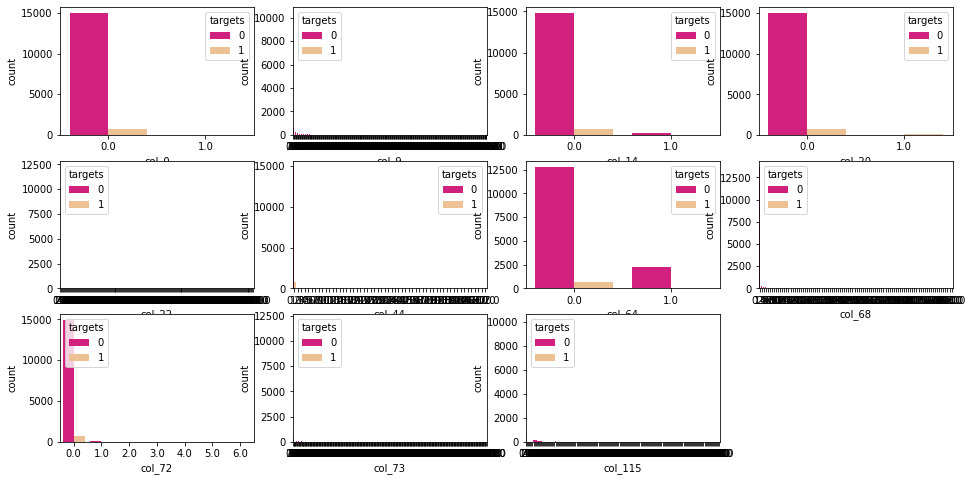

In [306]:
# Grouped bar plot of categorical features 
fig = plt.figure(figsize = (16,8))
for i in range(len(cat_cols)):
    column =cat_cols[i]
    sub= fig.add_subplot(3, 4, i + 1)
    chart = sns.countplot(data = transaction_data, x= column, hue= 'targets', palette = 'Accent_r')

# Feature engineering- Dropping unnecessary features

In [172]:
transaction_data

,targets,transaction_amount,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,...,col_109,col_110,col_111,col_114,col_115,company,industry,transaction_date_day,Days_bw_creation_and_transaction,customer_tenure
0,1,52092.586207,0.0,False,25.00,0,0,False,False,E,...,0,0,True,0,0.0,Manny,Auto Parts,Sunday,97.0,656.0
1,0,50042.970326,0.0,False,25.00,0,0,False,True,B,...,0,0,False,0,0.0,Zach,Agriculture,Sunday,140.0,699.0
2,0,54255.114574,0.0,False,25.00,0,0,False,False,A,...,0,0,False,0,0.0,Fiona,Technical Services,Sunday,167.0,726.0
3,0,61722.527737,0.0,True,25.00,0,9,False,False,C,...,0,0,False,0,0.0,Omar,Exteriors,Sunday,173.0,732.0
4,0,54313.312765,0.0,True,25.00,0,0,False,True,C,...,14,0,False,0,29.0,Steve,Utilities,Sunday,202.0,761.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776,0,58000.013393,0.0,True,17.22,0,0,False,True,A,...,9,0,False,0,5.0,Laura,Utilities,Friday,125.0,595.0
15777,0,50356.467423,0.0,True,17.22,1,0,False,False,B,...,98,5,False,0,1.0,Kathy,Food Processing,Friday,146.0,616.0
15778,0,51274.840357,0.0,True,17.22,0,0,False,True,C,...,8,0,False,0,0.0,Xavier,Technical Services,Friday,165.0,635.0
15779,0,51612.014451,0.0,True,17.22,2,0,False,False,A,...,0,0,False,0,0.0,David,Tutoring,Friday,183.0,653.0


In [174]:
data = transaction_data.copy()

# Convert any categorical variables to numerical using label encoding
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == np.object or column=='targets':
        data[column] = le.fit_transform(data[column])

# Calculate the correlation matrix and select highly correlated features
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
# data.drop(to_drop, axis=1, inplace=True)

# Remove low variance features
selector = VarianceThreshold(threshold=0.1)
selected_data = selector.fit_transform(data)
dropped_columns = data.columns[~selector.get_support()]

# Calculate mutual information and select highly informative features
mutual_info = mutual_info_classif(data.iloc[:, 1:], data.iloc[:, 0], random_state=0)
mutual_info = pd.Series(mutual_info)
mutual_info.index = data.iloc[:, :-1].columns
mutual_info.sort_values(ascending=False,inplace=True)

# Print the results
print("Correlated features to drop: ", to_drop)
print("Mutual Information: \n", mutual_info)
print("Variance Threshold: \n", dropped_columns)

C:\Users\rmanoger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\rmanoger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depre

Correlated features to drop:  ['col_38', 'customer_tenure']
Mutual Information: 
 company                             0.105550
transaction_date_day                0.099401
Days_bw_creation_and_transaction    0.072735
col_110                             0.043755
col_40                              0.042540
                                      ...   
col_66                              0.000000
col_96                              0.000000
col_16                              0.000000
col_71                              0.000000
col_56                              0.000000
Length: 100, dtype: float64
Variance Threshold: 
 Index(['targets', 'col_0', 'col_5', 'col_12', 'col_14', 'col_20', 'col_31',
       'col_33', 'col_34', 'col_42', 'col_47', 'col_48', 'col_54', 'col_57',
       'col_60', 'col_61', 'col_66', 'col_70', 'col_72', 'col_75', 'col_82',
       'col_83', 'col_84', 'col_86', 'col_88', 'col_89', 'col_95', 'col_96',
       'col_97', 'col_100', 'col_102', 'col_107', 'col_108', 'col_

In [195]:
#Removing columns with high correlation between features, low variance features and features with least mutual information
#The previous approach involved removing features based on random forest feature importance
cols_to_remove = set(list(mutual_info[mutual_info.values==0].keys())+to_drop+list(dropped_columns))-{'targets'}

# Modelling

In [223]:
transaction_data_ftr_rmd = transaction_data.copy()

In [224]:
#Removing the unimportant features
transaction_data_ftr_rmd.drop(cols_to_remove,axis=1,inplace=True)

In [225]:
#Creating a count encoder for the categorical columns
transaction_data_ftr_rmd = CountEncoder(cols=['col_7','col_15','col_30','col_40','company','transaction_date_day'], normalize=True).fit(transaction_data_ftr_rmd).transform(transaction_data_ftr_rmd)

In [227]:
transaction_data_ftr_rmd

,targets,transaction_amount,col_1,col_2,col_4,col_6,col_7,col_8,col_9,col_10,...,col_99,col_105,col_106,col_109,col_110,col_114,col_115,company,transaction_date_day,Days_bw_creation_and_transaction
0,1,52092.586207,False,25.00,0,False,0.059946,0,0.0,11,...,0,0,0,0,0,0,0.0,0.019327,0.145238,97.0
1,0,50042.970326,False,25.00,0,True,0.153412,0,0.0,23,...,0,0,0,0,0,0,0.0,0.016666,0.145238,140.0
2,0,54255.114574,False,25.00,0,False,0.304163,0,0.0,58,...,0,0,0,0,0,0,0.0,0.019074,0.145238,167.0
3,0,61722.527737,True,25.00,9,False,0.428807,0,1.0,44,...,0,0,0,0,0,0,0.0,0.019644,0.145238,173.0
4,0,54313.312765,True,25.00,0,True,0.428807,1,0.0,1608,...,1,1,98,14,0,0,29.0,0.021355,0.145238,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776,0,58000.013393,True,17.22,0,True,0.304163,2,50.0,477,...,4,0,34,9,0,0,5.0,0.021482,0.141056,125.0
15777,0,50356.467423,True,17.22,0,False,0.153412,0,60.0,788,...,0,0,56,98,5,0,1.0,0.021418,0.141056,146.0
15778,0,51274.840357,True,17.22,0,True,0.428807,0,6.0,108,...,0,0,4,8,0,0,0.0,0.018567,0.141056,165.0
15779,0,51612.014451,True,17.22,0,False,0.304163,0,2.0,167,...,0,0,0,0,0,0,0.0,0.019390,0.141056,183.0


In [228]:
#Using a minmaxscaler because of the presence of ordinal variables which will be normalized without getting affected
slr = MinMaxScaler()
num_cols_scaled = slr.fit_transform(transaction_data_ftr_rmd.select_dtypes(np.number))
transaction_data_ftr_rmd[transaction_data_ftr_rmd.select_dtypes(np.number).columns] = num_cols_scaled

In [ ]:
#Stratify is made true so that train_test_split method returns training and test subsets that have the same proportions 
#of class labels as the input dataset
X_train, X_test, y_train, y_test = train_test_split(transaction_data_ftr_rmd.drop('targets',axis=1),
                                                    transaction_data_ftr_rmd['targets'], test_size=0.2,
                                                    random_state=42,stratify=transaction_data_ftr_rmd['targets'])

In [229]:
transaction_data_ftr_rmd

,targets,transaction_amount,col_1,col_2,col_4,col_6,col_7,col_8,col_9,col_10,...,col_99,col_105,col_106,col_109,col_110,col_114,col_115,company,transaction_date_day,Days_bw_creation_and_transaction
0,1,0.000100,False,0.620112,0,False,0.016723,0,0.0,0.000424,...,0,0,0,0,0,0,0.0,0.489051,0.818841,0.220126
1,0,0.000002,False,0.620112,0,True,0.265878,0,0.0,0.000887,...,0,0,0,0,0,0,0.0,0.182482,0.818841,0.355346
2,0,0.000204,False,0.620112,0,False,0.667736,0,0.0,0.002237,...,0,0,0,0,0,0,0.0,0.459854,0.818841,0.440252
3,0,0.000562,True,0.620112,9,False,1.000000,0,1.0,0.001697,...,0,0,0,0,0,0,0.0,0.525547,0.818841,0.459119
4,0,0.000207,True,0.620112,0,True,1.000000,1,0.0,0.062020,...,1,1,98,14,0,0,29.0,0.722628,0.818841,0.550314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776,0,0.000384,True,0.137182,0,True,0.667736,2,50.0,0.018398,...,4,0,34,9,0,0,5.0,0.737226,0.579710,0.308176
15777,0,0.000017,True,0.137182,0,False,0.265878,0,60.0,0.030393,...,0,0,56,98,5,0,1.0,0.729927,0.579710,0.374214
15778,0,0.000061,True,0.137182,0,True,1.000000,0,6.0,0.004166,...,0,0,4,8,0,0,0.0,0.401460,0.579710,0.433962
15779,0,0.000077,True,0.137182,0,False,0.667736,0,2.0,0.006441,...,0,0,0,0,0,0,0.0,0.496350,0.579710,0.490566


### GridSearchCV

In [286]:
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)

In [287]:
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = ['balanced']
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = ['balanced']
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = ['balanced']
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = ['balanced']
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

In [288]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]

In [292]:
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train)
gs.best_params_

{'classifier': RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=250,
                        random_state=42),
 'classifier__class_weight': 'balanced',
 'classifier__max_depth': 20,
 'classifier__n_estimators': 250}

In [290]:
gs.best_score_

0.9921814444319997

In [291]:
print("Test Precision:",precision_score(gs.predict(X_test), y_test))
print("Test Recall:",recall_score(gs.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

Test Precision: 0.6666666666666666
Test Recall: 0.9259259259259259
Test ROC AUC Score: 0.9547635533204573


In [310]:
best_rf = RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=250,
                        random_state=42)

In [311]:
# best_rf = rf_gs.best_estimator_
best_rf.fit(X_train, y_train)

# Get the feature importances from the best estimator
feature_importances = best_rf.feature_importances_

In [313]:
best_rf.feature_importances_

array([1.66265258e-02, 1.46117581e-02, 1.28673279e-02, 1.71946897e-03,
       3.93364655e-03, 7.88982760e-02, 4.61862841e-04, 3.37267587e-02,
       2.60467469e-02, 2.77519299e-03, 1.05482740e-02, 3.38684004e-03,
       2.59250087e-04, 2.10156272e-03, 6.04523970e-03, 2.36244031e-02,
       0.00000000e+00, 9.53272415e-04, 1.01199627e-02, 1.82501772e-03,
       6.28354084e-03, 1.39506860e-02, 1.69722672e-05, 2.43308481e-03,
       1.72743552e-03, 6.38613432e-04, 7.47411831e-04, 8.70659709e-03,
       6.33696474e-03, 1.47067111e-02, 3.01409485e-03, 1.99020297e-03,
       4.76421771e-03, 1.38500017e-03, 6.86547847e-03, 6.96356236e-03,
       1.91814788e-02, 1.34764745e-01, 1.35298066e-03, 3.01017519e-02,
       3.76040829e-02, 2.51051393e-02, 4.70594107e-03, 4.12118168e-04,
       2.37611430e-02, 6.69096498e-04, 6.61958904e-04, 4.65584133e-03,
       1.76924648e-03, 2.77041559e-02, 1.75996289e-06, 6.40908086e-03,
       1.68768403e-02, 8.08305709e-03, 3.25117620e-01])

In [315]:
feature_names = X_train.columns

# Create a DataFrame of feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print(feature_importance_df.head(10))

                             Feature  Importance
54  Days_bw_creation_and_transaction    0.325118
37                            col_77    0.134765
5                              col_7    0.078898
40                            col_85    0.037604
7                              col_9    0.033727
39                            col_79    0.030102
49                           col_110    0.027704
8                             col_10    0.026047
41                            col_90    0.025105
44                            col_98    0.023761


In [316]:
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Find the threshold that maximizes TPR while minimizing FPR
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('Optimal Threshold:', optimal_threshold)

Optimal Threshold: 0.11672956733867891
